# 911 Calls Capstone Project 

---



For this project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

____
** Importing numpy and pandas **

In [3]:
import numpy as np
import pandas as pd

** Importing visualization libraries and set %matplotlib inline. **

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Reading in the csv file as a dataframe called df **

In [6]:
df = pd.read_csv('911.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [7]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0


## Questions to analyze

** What are the top 5 zipcodes for 911 calls? **

In [8]:
df['zip'].value_counts().head(5)

19401.0    398
19464.0    345
19403.0    300
19446.0    266
19406.0    201
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [9]:
df['twp'].value_counts().head(5)

LOWER MERION    412
ABINGTON        381
NORRISTOWN      330
UPPER MERION    316
CHELTENHAM      234
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [10]:
df['title'].nunique()

78

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Using .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [11]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

** What is the most common Reason for a 911 call based off of this new column? **

In [12]:
df['Reason'].value_counts()

EMS        2663
Traffic    2222
Fire        800
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

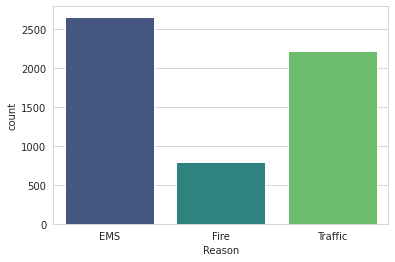

In [13]:
sns.countplot(x='Reason',data=df,palette='viridis')

___
** What is the data type of the objects in the timeStamp column? **

In [14]:
type(df['timeStamp'].iloc[0])

str

** Using [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [15]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

** Now that the timestamp column are actually DateTime objects, using .apply() to create 3 new columns called Hour, Month, and Day of Week. we will create these columns based off of the timeStamp column, reference the solutions if we get stuck on this step.**

In [16]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [17]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [18]:
df['Day of Week'] = df['Day of Week'].map(dmap)

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

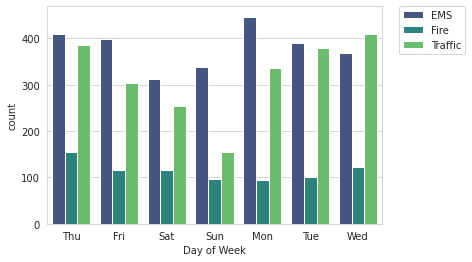

In [19]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

** Now do the same for Month:**

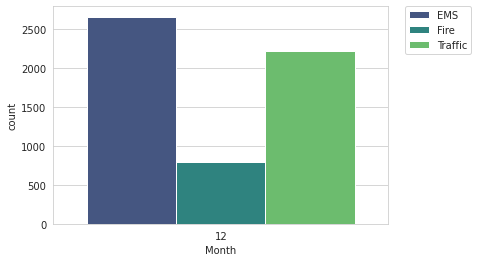

In [20]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [21]:
# The plot is missing some months! 9,10, and 11 are not there.

** Let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

** Now creating a gropuby object called byMonth, where we group the DataFrame by the month column and using the count() method for aggregation. **

In [22]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
12,5685,5685,5685,4926,5685,5685,5681,5651,5684,5685,5685,5685


** creating a simple plot off of the dataframe indicating the count of calls per month. **

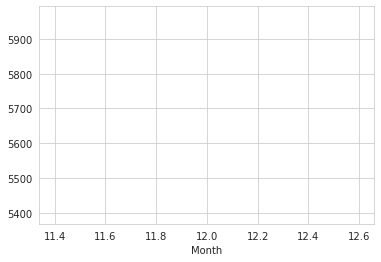

In [23]:
# Could be any column
byMonth['twp'].plot()

** using seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

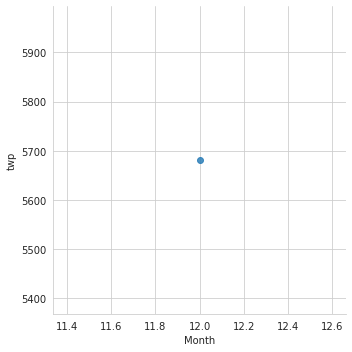

In [24]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

**Creating a new column called 'Date' that contains the date from the timeStamp column. we'll need to use apply along with the .date() method. ** 

In [25]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

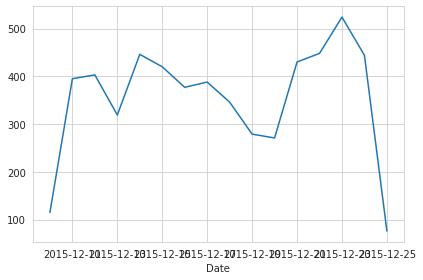

In [26]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

** Now recreating this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

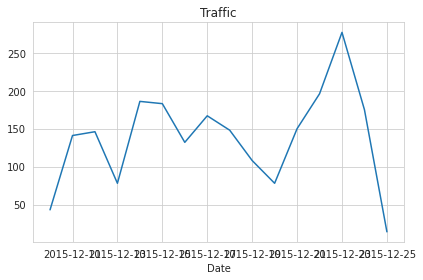

In [27]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

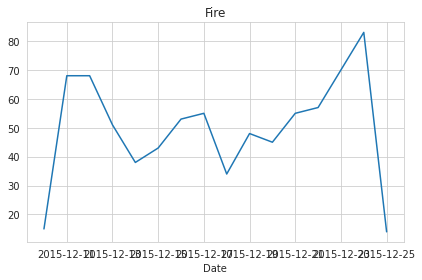

In [28]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

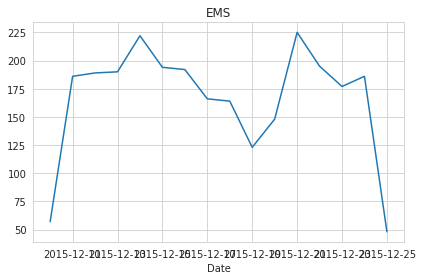

In [29]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but we would do it by trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. **

In [30]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,16,12,14,10,16,11,14,33,56,24,...,51,57,55,81,53,44,35,25,25,6
Mon,20,16,14,12,9,21,26,42,41,36,...,38,50,70,67,69,40,34,33,29,23
Sat,7,6,5,11,6,11,3,13,15,26,...,41,45,42,44,55,57,23,39,32,28
Sun,22,14,15,15,8,9,15,25,20,24,...,39,40,32,32,44,29,26,20,24,13
Thu,18,18,10,10,13,11,19,23,49,31,...,67,52,51,77,94,53,59,39,27,20


** creating a HeatMap using this new DataFrame. **

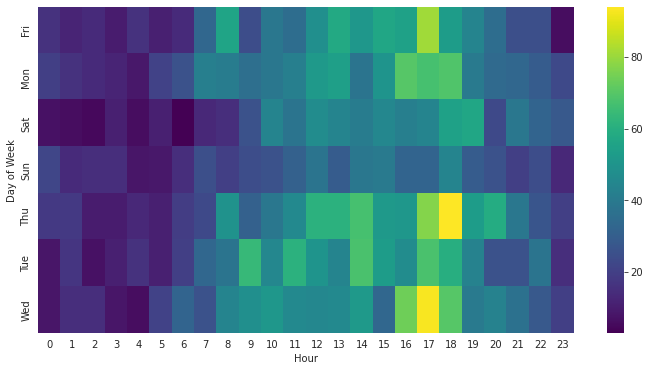

In [31]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

**creating a clustermap using this DataFrame. **

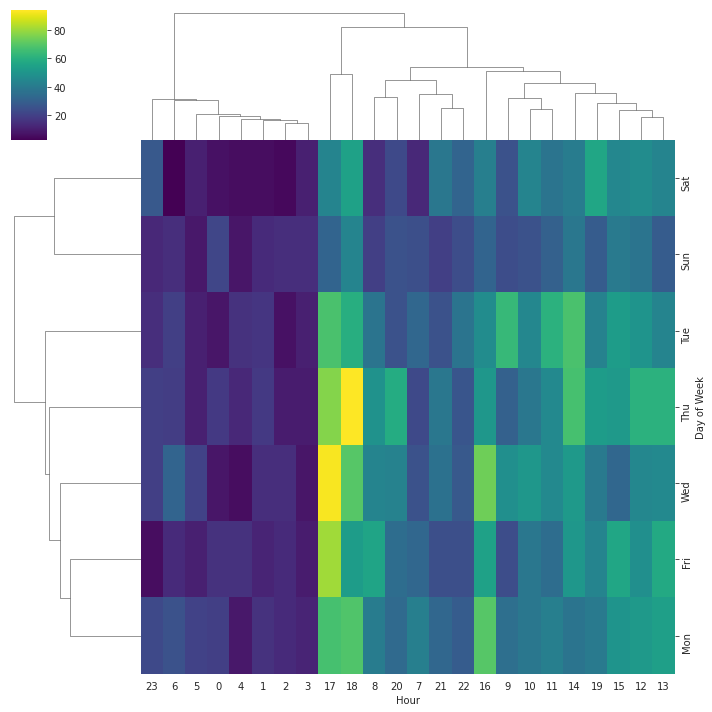

In [32]:
sns.clustermap(dayHour,cmap='viridis')

** Repeating these same plots and operations, for a DataFrame that shows the Month as the column. **

In [33]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,12
Day of Week,
Fri,818
Mon,877
Sat,682
Sun,590
Thu,948


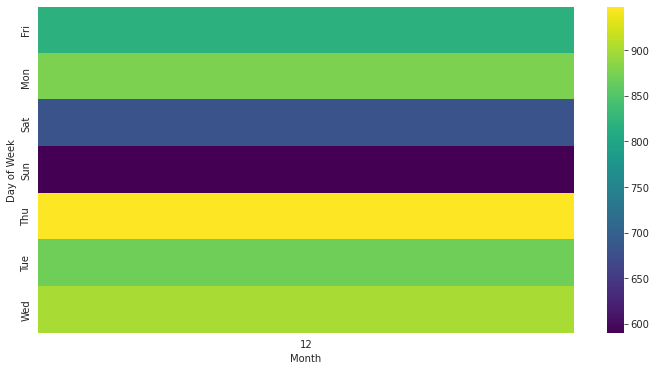

In [34]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')